In [376]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [377]:
police_precinct_outlines = gpd.read_file('../data/police_precinct_outlines.geojson')
print(police_precinct_outlines.crs)
police_precinct_outlines

epsg:4326


,precinct,shape_area,shape_len,geometry
0,CENTRAL,98541971.0257,46234.6717307,"MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ..."
1,EAST,562260180.986,90261.1338967,"MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ..."
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."
3,MADISON,1913402934.01,254564.86409,"MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ..."
4,MIDTOWN-HILLS,1317030605.73,187104.273068,"MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ..."
5,NORTH,3287881220.97,334895.629437,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
6,SOUTH,1936875931.39,422441.749973,"MULTIPOLYGON (((-86.63676 36.07248, -86.63664 ..."
7,WEST,3037053503.78,319947.055426,"MULTIPOLYGON (((-86.90759 36.13557, -86.90545 ..."


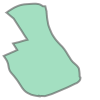

In [378]:
police_precinct_outlines.loc[0, 'geometry']

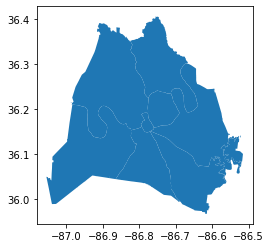

In [379]:
police_precinct_outlines.plot();

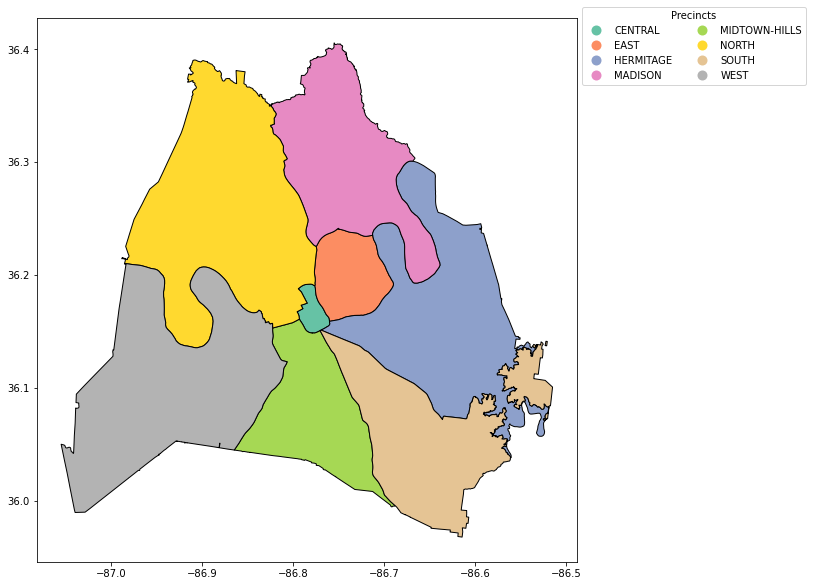

In [380]:
leg_kwds = {'title': 'Precincts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

police_precinct_outlines.plot(column = 'precinct', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [381]:
homicides = pd.read_csv('../data/police_incidents_cleaned.csv')
print(homicides.shape)
homicides.head(3)

(75, 17)


,Investigation Status,Incident Occurred,incident_location,lat,lng,zip_code,RPA,Zone,Location Code,Location Description,Offense Number,Offense NIBRS,Offense Description,Weapon Primary,weapon,number_victims,mapped_location
0,Closed,10/16/2019 22:00,1900 LEBANON PIKE,36.157,-86.708,37210.0,9019.0,513.0,28,"OTHER, UNKNOWN",1,09A,HOMICIDE,9,PERSONAL (HANDS),1,POINT (-86.708 36.157)
1,Closed,9/28/2019 18:11,1400 ROSEDALE AVE,36.196,-86.757,37207.0,1875.0,221.0,22,"RESIDENCE, HOME",1,09A,HOMICIDE- CRIMINAL,01S,HANDGUN - SEMIAUTOMATIC,1,POINT (-86.757 36.196)
2,Open,12/31/2019 23:50,I 65 S,36.180,-86.800,NaN,NaN,NaN,13,"HIGHWAY, ROAD, ALLEY",1,09A,HOMICIDE,5,OTHER FIREARM,1,POINT (-86.8 36.18)


In [382]:
homicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Investigation Status  75 non-null     object 
 1   Incident Occurred     75 non-null     object 
 2   incident_location     75 non-null     object 
 3   lat                   75 non-null     float64
 4   lng                   75 non-null     float64
 5   zip_code              49 non-null     float64
 6   RPA                   48 non-null     float64
 7   Zone                  48 non-null     float64
 8   Location Code         75 non-null     int64  
 9   Location Description  75 non-null     object 
 10  Offense Number        75 non-null     int64  
 11  Offense NIBRS         75 non-null     object 
 12  Offense Description   75 non-null     object 
 13  Weapon Primary        75 non-null     object 
 14  weapon                74 non-null     object 
 15  number_victims        75 

In [383]:
homicides['geometry'] = homicides.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
homicides.head(3)

,Investigation Status,Incident Occurred,incident_location,lat,lng,zip_code,RPA,Zone,Location Code,Location Description,Offense Number,Offense NIBRS,Offense Description,Weapon Primary,weapon,number_victims,mapped_location,geometry
0,Closed,10/16/2019 22:00,1900 LEBANON PIKE,36.157,-86.708,37210.0,9019.0,513.0,28,"OTHER, UNKNOWN",1,09A,HOMICIDE,9,PERSONAL (HANDS),1,POINT (-86.708 36.157),POINT (-86.708 36.157)
1,Closed,9/28/2019 18:11,1400 ROSEDALE AVE,36.196,-86.757,37207.0,1875.0,221.0,22,"RESIDENCE, HOME",1,09A,HOMICIDE- CRIMINAL,01S,HANDGUN - SEMIAUTOMATIC,1,POINT (-86.757 36.196),POINT (-86.75700000000001 36.196)
2,Open,12/31/2019 23:50,I 65 S,36.180,-86.800,NaN,NaN,NaN,13,"HIGHWAY, ROAD, ALLEY",1,09A,HOMICIDE,5,OTHER FIREARM,1,POINT (-86.8 36.18),POINT (-86.8 36.18)


In [384]:
police_precinct_outlines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [385]:
homicides_geo = gpd.GeoDataFrame(homicides, 
                           crs = police_precinct_outlines.crs, 
                           geometry = homicides['geometry'])

In [386]:
type(homicides_geo)

geopandas.geodataframe.GeoDataFrame

In [387]:
homicides = homicides[['incident_location', 'zip_code', 'weapon', 'number_victims', 'lat', 'lng', 'geometry']]

In [388]:
homicides_by_precinct = gpd.sjoin(homicides_geo, police_precinct_outlines, op = 'within')

In [389]:
homicides_by_precinct.head()

,Investigation Status,Incident Occurred,incident_location,lat,lng,zip_code,RPA,Zone,Location Code,Location Description,...,Offense Description,Weapon Primary,weapon,number_victims,mapped_location,geometry,index_right,precinct,shape_area,shape_len
0,Closed,10/16/2019 22:00,1900 LEBANON PIKE,36.157,-86.708,37210.0,9019.0,513.0,28,"OTHER, UNKNOWN",...,HOMICIDE,9,PERSONAL (HANDS),1,POINT (-86.708 36.157),POINT (-86.70800 36.15700),2,HERMITAGE,2496337143.44,521944.947628
7,Closed,4/2/2019 21:00,4600 BROOKE VALLEY DR,36.177,-86.587,37076.0,9539.0,523.0,13,"HIGHWAY, ROAD, ALLEY",...,HOMICIDE,2,RIFLE,1,POINT (-86.587 36.177),POINT (-86.58700 36.17700),2,HERMITAGE,2496337143.44,521944.947628
10,Open,4/10/2019 18:11,VILLAGE GREEN DR,36.090,-86.630,NaN,NaN,NaN,22,"RESIDENCE, HOME",...,HOMICIDE- CRIMINAL,2,RIFLE,1,POINT (-86.63 36.09),POINT (-86.63000 36.09000),2,HERMITAGE,2496337143.44,521944.947628
18,Closed,8/23/2019 22:28,3200 BLACKWOOD DR,36.151,-86.628,37214.0,8955.0,533.0,3,"BAR, NIGHT CLUB",...,HOMICIDE,9,PERSONAL (HANDS),1,POINT (-86.628 36.151),POINT (-86.62800 36.15100),2,HERMITAGE,2496337143.44,521944.947628
21,Closed,7/17/2019 3:55,400 MONACO DR,36.207,-86.614,37076.0,9719.0,523.0,22,"RESIDENCE, HOME",...,HOMICIDE- CRIMINAL,1,HANDGUN,1,POINT (-86.614 36.207),POINT (-86.61400 36.20700),2,HERMITAGE,2496337143.44,521944.947628


In [390]:
homicides_by_precinct['precinct'].value_counts()

NORTH            26
SOUTH            11
HERMITAGE         9
EAST              9
MIDTOWN-HILLS     7
MADISON           6
WEST              4
CENTRAL           3
Name: precinct, dtype: int64

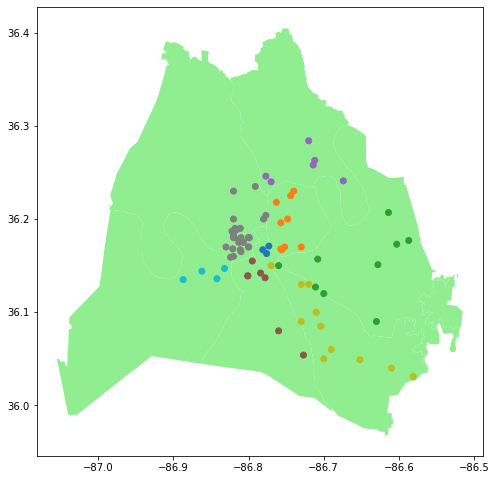

In [391]:
ax = police_precinct_outlines.plot(figsize = (8, 10), color = 'lightgreen')
homicides_by_precinct.plot( ax = ax, column = 'precinct');
plt.show();

In [392]:
homicides_nashville = homicides.loc[homicides_by_precinct['precinct'] == 'HERMITAGE']                                    
homicides_nashville.shape

(9, 7)

In [393]:
homicides_nashville

,incident_location,zip_code,weapon,number_victims,lat,lng,geometry
0,1900 LEBANON PIKE,37210.0,PERSONAL (HANDS),1,36.157,-86.708,POINT (-86.70800 36.15700)
7,4600 BROOKE VALLEY DR,37076.0,RIFLE,1,36.177,-86.587,POINT (-86.58700 36.17700)
10,VILLAGE GREEN DR,NaN,RIFLE,1,36.090,-86.630,POINT (-86.63000 36.09000)
18,3200 BLACKWOOD DR,37214.0,PERSONAL (HANDS),1,36.151,-86.628,POINT (-86.62800 36.15100)
21,400 MONACO DR,37076.0,HANDGUN,1,36.207,-86.614,POINT (-86.61400 36.20700)
29,1100 MURFREESBORO PIKE,37217.0,LETHAL/CUTTING INSTRUMENT,1,36.127,-86.711,POINT (-86.71100 36.12700)
57,GLENGARRY DR,NaN,HANDGUN,1,36.120,-86.700,POINT (-86.70000 36.12000)
63,1400 PRINCETON PL,37076.0,HANDGUN,1,36.173,-86.603,POINT (-86.60300 36.17300)
68,LAFAYETTE ST,NaN,HANDGUN,1,36.150,-86.760,POINT (-86.76000 36.15000)


In [394]:
police_precinct_outlines.geometry.centroid

<ipython-input-394-1e87d4a143cf>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  police_precinct_outlines.geometry.centroid


0    POINT (-86.77888 36.16793)
1    POINT (-86.73801 36.19984)
2    POINT (-86.63656 36.16463)
3    POINT (-86.74077 36.29954)
4    POINT (-86.77745 36.07746)
5    POINT (-86.87461 36.25565)
6    POINT (-86.64764 36.05903)
7    POINT (-86.93664 36.10266)
dtype: geometry

In [395]:
center = police_precinct_outlines.geometry.centroid(4)
print(center)

<ipython-input-395-70ac4909650d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = police_precinct_outlines.geometry.centroid(4)


TypeError: 'GeoSeries' object is not callable

In [ ]:
homicides['geometry'] = homicides.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
homicides.head(3)

In [396]:
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 12)

In [397]:
nash_map

In [398]:
i = 0
for row_index, row_values in homicides.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
incident_location         1900 LEBANON PIKE
zip_code                              37210
weapon                     PERSONAL (HANDS)
number_victims                            1
lat                                  36.157
lng                                 -86.708
geometry             POINT (-86.708 36.157)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
incident_location                    1400 ROSEDALE AVE
zip_code                                         37207
weapon                         HANDGUN - SEMIAUTOMATIC
number_victims                                       1
lat                                             36.196
lng                                            -86.757
geometry             POINT (-86.75700000000001 36.196)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
incident_location                 I 65 S
zip_code                             NaN
weapon                     OTHER FIREARM
number_vi

In [399]:
nash_map = folium.Map(location =  [36.1612, -86.7775], zoom_start = 12)

folium.GeoJson(police_precinct_outlines).add_to(nash_map)

for row_index, row_values in homicides.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['weapon'])
    icon=folium.Icon(color="blue",icon="taxi", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(nash_map)
nash_map.save('../maps/nash_map.html')

nash_map

In [400]:
i = 0
for row_index, row_values in police_precinct_outlines.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
precinct                                                CENTRAL
shape_area                                        98541971.0257
shape_len                                         46234.6717307
geometry      (POLYGON ((-86.77524596288148 36.1489445562990...
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
precinct                                                   EAST
shape_area                                        562260180.986
shape_len                                         90261.1338967
geometry      (POLYGON ((-86.7497744006488 36.24057415802699...
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
precinct                                              HERMITAGE
shape_area                                        2496337143.44
shape_len                                         521944.947628
geometry      (POLYGON ((-86.61306027277456 36.2442717662193...
Name: 2, dtype: object
------------------------- 


In [401]:
i = 0
for row_index, row_values in homicides_by_precinct.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Investigation Status                    Closed
Incident Occurred             10/16/2019 22:00
incident_location            1900 LEBANON PIKE
lat                                     36.157
lng                                    -86.708
zip_code                                 37210
RPA                                       9019
Zone                                       513
Location Code                               28
Location Description            OTHER, UNKNOWN
Offense Number                               1
Offense NIBRS                              09A
Offense Description                   HOMICIDE
Weapon Primary                               9
weapon                        PERSONAL (HANDS)
number_victims                               1
mapped_location         POINT (-86.708 36.157)
geometry                POINT (-86.708 36.157)
index_right                                  2
precinct                             HERMITAGE
shape_area                       24

In [402]:
homicides_by_precinct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 75 entries, 0 to 66
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Investigation Status  75 non-null     object  
 1   Incident Occurred     75 non-null     object  
 2   incident_location     75 non-null     object  
 3   lat                   75 non-null     float64 
 4   lng                   75 non-null     float64 
 5   zip_code              49 non-null     float64 
 6   RPA                   48 non-null     float64 
 7   Zone                  48 non-null     float64 
 8   Location Code         75 non-null     int64   
 9   Location Description  75 non-null     object  
 10  Offense Number        75 non-null     int64   
 11  Offense NIBRS         75 non-null     object  
 12  Offense Description   75 non-null     object  
 13  Weapon Primary        75 non-null     object  
 14  weapon                74 non-null     object  
 15  

In [403]:
nash_map = folium.Map(location =  [36.1612, -86.7775], zoom_start = 12)

folium.GeoJson(police_precinct_outlines).add_to(nash_map)

for row_index, row_values in homicides_by_precinct.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values[['precinct','weapon', 'incident_location', 'Incident Occurred', 'Investigation Status',
                         'number_victims']])
    icon=folium.Icon(color="blue",icon="taxi", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(nash_map)
nash_map.save('../maps/nash_map.html')

nash_map

In [404]:
cluster_map_nash = folium.Map(location =  [36.1612, -86.7775], zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_nash)

folium.GeoJson(police_precinct_outlines).add_to(cluster_map_nash)

for row_index, row_values in homicides_by_precinct.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values[['precinct','weapon', 'incident_location', 'Incident Occurred', 'Investigation Status',
                         'number_victims']])
    icon=folium.Icon(color="red",icon="ambulance", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
cluster_map_nash.save('../maps/cluster_map_nash.html')

cluster_map_nash 